In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_cycle = 100
dis_pi = 10
feed = 2

In [3]:
dataset = np.linspace(0,num_cycle*math.pi,dis_pi*num_cycle)

In [4]:
dataset
print(np.shape(dataset))
dataset = np.reshape(dataset, (dis_pi*num_cycle,1))
print(type(dataset))

(1000,)
<class 'numpy.ndarray'>


In [5]:
sin_dataset = []

In [6]:
for i in dataset:
    sin_dataset.append(math.sin(i))

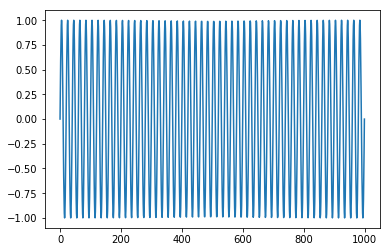

In [7]:
plt.plot(sin_dataset)

In [8]:
train_dataset = sin_dataset[:900]
test_dataset = sin_dataset[900:]

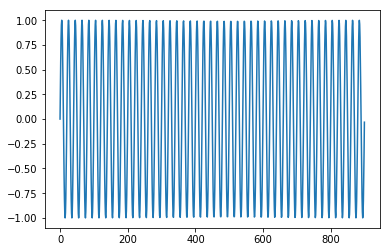

In [9]:
plt.plot(train_dataset)

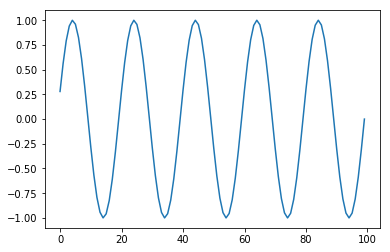

In [10]:
plt.plot(test_dataset)

In [11]:
# define train_dataset

In [12]:
train_X = []
train_y = []

In [13]:
for i in range(feed,len(train_dataset)):
    train_X.append(train_dataset[(i-feed):i])
    train_y.append(train_dataset[i])

In [14]:
print(np.shape(train_X), np.shape(train_y))

(898, 2) (898,)


In [15]:
train_X = np.reshape(train_X, (np.shape(train_X)[0], np.shape(train_X)[1], 1))
train_y = np.reshape(train_y, (np.shape(train_y)[0], 1))

In [16]:
print(np.shape(train_X), np.shape(train_y))

(898, 2, 1) (898, 1)


In [17]:
# define test_dataset

In [18]:
test_X = []
test_y = []

In [19]:
for i in range(feed, len(test_dataset)):
    test_X.append(test_dataset[(i-feed):i])
    test_y.append(test_dataset[i])

In [20]:
print(np.shape(test_X), np.shape(test_y))

(98, 2) (98,)


In [21]:
test_X = np.reshape(test_X, (np.shape(test_X)[0], np.shape(test_X)[1], 1))
test_y = np.reshape(test_y, (np.shape(test_y)[0], 1))

In [22]:
print(np.shape(test_X), np.shape(test_y))

(98, 2, 1) (98, 1)


In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

/Users/admin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_X.shape[1], 1)))
regressor.add(Dropout(0.2))

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [26]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [27]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
regressor.fit(train_X, train_y, epochs = 10, batch_size = 32)

Epoch 1/10
898/898 [==============================] - 4s 4ms/step - loss: 0.4995
Epoch 2/10
898/898 [==============================] - 1s 624us/step - loss: 0.3622
Epoch 3/10
898/898 [==============================] - 1s 610us/step - loss: 0.1693
Epoch 4/10
898/898 [==============================] - 1s 620us/step - loss: 0.1637
Epoch 5/10
898/898 [==============================] - 1s 622us/step - loss: 0.1630
Epoch 6/10
898/898 [==============================] - 1s 603us/step - loss: 0.1624
Epoch 7/10
898/898 [==============================] - 1s 591us/step - loss: 0.1593
Epoch 8/10
898/898 [==============================] - 1s 593us/step - loss: 0.1597
Epoch 9/10
898/898 [==============================] - 1s 606us/step - loss: 0.1514
Epoch 10/10
898/898 [==============================] - 1s 718us/step - loss: 0.1433


Text(0,0.5,'height')

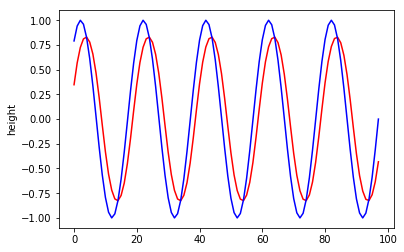

In [29]:
predict = regressor.predict(test_X)
plt.plot(predict, color = 'red', label = 'Predict')
plt.plot(test_y, color = 'blue', label = 'Real')
plt.ylabel('height')

In [30]:
test_x = test_X[0]
result = []
print(np.shape(test_x))

(2, 1)


In [31]:
for i in range(96):
    print(i)
    test_xx = test_x[-feed:]
    test_xx = np.reshape(test_xx, (1, np.shape(test_xx)[0], 1))
    predict = regressor.predict(test_xx)
    result.append(predict)
    test_x = list(test_x)
    test_x.append(predict)
    test_x = test_x[-feed:]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


In [32]:
print(np.shape(result), np.shape(test_y))
result = np.reshape(result, (np.shape(result)[0], 1))
print(np.shape(result), np.shape(test_y))

(96, 1, 1) (98, 1)
(96, 1) (98, 1)


Text(0,0.5,'height')

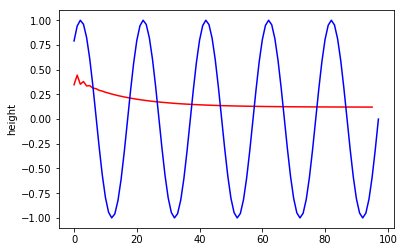

In [33]:
plt.plot(result, color = 'red', label = 'Predict')
plt.plot(test_y, color = 'blue', label = 'Real')
plt.ylabel('height')